# Importing the packages required

In [89]:
#import geopandas
#import fiona.crs
#import georasters


import pandas as pd
import shapely
import rasterio
import gdal
import os
import pygis
import richdem as rd
import earthpy as et
%matplotlib inline


In [90]:
print(os.popen('gdalinfo --version').read().rstrip())

GDAL 2.3.3, released 2018/12/14


In [91]:
filename = 'D:/BeCode/Maps/DSM_DHMVIIDSMRAS1m_k01/GeoTIFF/DHMVIIDSMRAS1m_k01.tif' #DSM
filename2 = 'D:/BeCode/Maps/DTM_DHMVIIDTMRAS1m_k01/GeoTIFF/DHMVIIDTMRAS1m_k01.tif' #DTM

# Get Raster Metadata

In [92]:
ds = gdal.Open(filename)
ds2 = gdal.Open(filename2)
print (ds.GetMetadata())
print (ds2.GetMetadata())

{'AREA_OR_POINT': 'Area', 'VERTICAL_SRS': 'EPSG:5110'}
{'AREA_OR_POINT': 'Area', 'VERTICAL_SRS': 'EPSG:5110'}


In [93]:
print(ds.GetDescription())
print(ds2.GetDescription())

D:/BeCode/Maps/DSM_DHMVIIDSMRAS1m_k01/GeoTIFF/DHMVIIDSMRAS1m_k01.tif
D:/BeCode/Maps/DTM_DHMVIIDTMRAS1m_k01/GeoTIFF/DHMVIIDTMRAS1m_k01.tif


In [94]:
print(ds.RasterCount)
print(ds2.RasterCount)

1
1


# Basic Raster Info

In [95]:
print(ds.RasterXSize,ds.RasterYSize )
print(ds2.RasterXSize,ds.RasterYSize )

17000 9000
17000 9000


In [96]:
print(ds.GetProjection())
print(ds2.GetProjection())

PROJCS["Belge 1972 / Belgian Lambert 72",GEOGCS["Belge 1972",DATUM["Reseau_National_Belge_1972",SPHEROID["International 1924",6378388,297,AUTHORITY["EPSG","7022"]],TOWGS84[-106.869,52.2978,-103.724,0.3366,-0.457,1.8422,-1.2747],AUTHORITY["EPSG","6313"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4313"]],PROJECTION["Lambert_Conformal_Conic_2SP"],PARAMETER["standard_parallel_1",51.16666723333333],PARAMETER["standard_parallel_2",49.8333339],PARAMETER["latitude_of_origin",90],PARAMETER["central_meridian",4.367486666666666],PARAMETER["false_easting",150000.013],PARAMETER["false_northing",5400088.438],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["X",EAST],AXIS["Y",NORTH],AUTHORITY["EPSG","31370"]]
PROJCS["Belge 1972 / Belgian Lambert 72",GEOGCS["Belge 1972",DATUM["Reseau_National_Belge_1972",SPHEROID["International 1924",6378388,297,AUTHORITY["EPSG","7022"]],TOWGS84[-106.869,52.2978,-103.724,0.3366,-0.457,1.842

In [97]:
print(ds.GetGeoTransform())
print(ds2.GetGeoTransform())

(145000.0, 1.0, 0.0, 247000.0, 0.0, -1.0)
(145000.0, 1.0, 0.0, 247000.0, 0.0, -1.0)


In [99]:
print("Number of Layer or Raster bands ", ds.RasterCount)
print("Number of Layer or Raster bands ", ds2.RasterCount)


Number of Layer or Raster bands  1
Number of Layer or Raster bands  1


# Raster Band Info

In [79]:

src_ds = gdal.Open( filename )
if src_ds is None:
    print ('Unable to open', filename)
    sys.exit(1)

print ("[ RASTER BAND COUNT ]: ", src_ds.RasterCount)
for band in range( src_ds.RasterCount ):
    band += 1
    print ("[ GETTING BAND ]: ", band)
    srcband = src_ds.GetRasterBand(band)
    if srcband is None:
        continue

    stats = srcband.GetStatistics( True, True )
    if stats is None:
        continue

    print ("[ STATS ] =  Minimum=%.3f, Maximum=%.3f, Mean=%.3f, StdDev=%.3f" % ( \
                stats[0], stats[1], stats[2], stats[3] ))

[ RASTER BAND COUNT ]:  1
[ GETTING BAND ]:  1
[ STATS ] =  Minimum=-3.250, Maximum=98.560, Mean=15.598, StdDev=7.060


In [100]:
band1 = ds.GetRasterBand(1)
band1 = ds2.GetRasterBand(1)

In [101]:

print("No Data Value : ", band1.GetNoDataValue())

No Data Value :  -9999.0


In [102]:
print("Min Data Value : ", band1.GetMinimum())
print("Max Data Value : ", band1.GetMaximum())
print("data type :", band1. GetUnitType())

Min Data Value :  3.1400001049042
Max Data Value :  33.270000457764
data type : 


In [103]:
print("band1 x size", band1.XSize)
print("band1 y size",band1.YSize)
print("band1 type", band1.DataType)

band1 x size 17000
band1 y size 9000
band1 type 6


# Visualizaing the geotif file

In [105]:
#Importing the tif file

print(filename)
print(filename2)

D:/BeCode/Maps/DSM_DHMVIIDSMRAS1m_k01/GeoTIFF/DHMVIIDSMRAS1m_k01.tif
D:/BeCode/Maps/DTM_DHMVIIDTMRAS1m_k01/GeoTIFF/DHMVIIDTMRAS1m_k01.tif


In [107]:
filename = rd.LoadGDAL('D:/BeCode/Maps/DSM_DHMVIIDSMRAS1m_k01/GeoTIFF/DHMVIIDSMRAS1m_k01.tif')
filename2 = rd.LoadGDAL('D:/BeCode/Maps/DTM_DHMVIIDTMRAS1m_k01/GeoTIFF/DHMVIIDTMRAS1m_k01.tif')


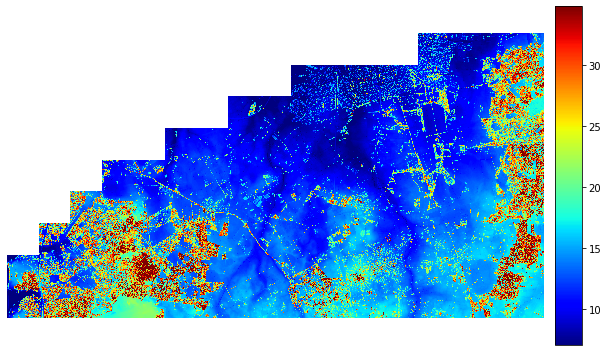

In [108]:
#For reference, the original DEM appears as follows

filenamefig = rd.rdShow(filename, ignore_colours=[0], axes=False, cmap='jet', figsize=(9,5))

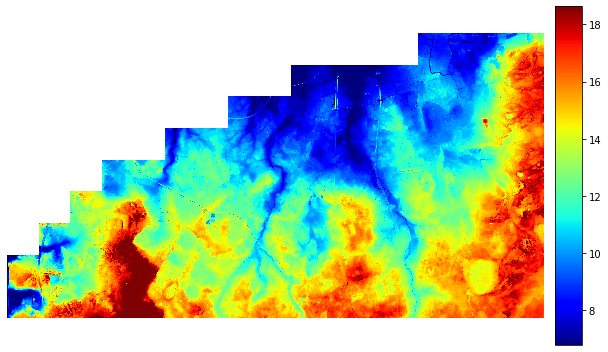

In [109]:
filenamefig2 = rd.rdShow(filename2, ignore_colours=[0], axes=False, cmap='jet', figsize=(9,5))

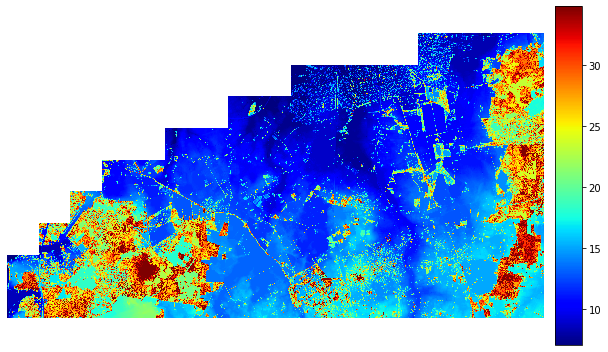

In [111]:
#Complete Filling
#Depression-filling is often used to fill in all the depressions in a DEM to the level of their lowest outlet or spill-point

filename_filled    = rd.FillDepressions(filename, in_place=False)
filenamefig_filled = rd.rdShow(filename_filled, ignore_colours=[0], axes=False, cmap='jet', vmin=filenamefig['vmin'], vmax=filenamefig['vmax'], figsize=(9,5))

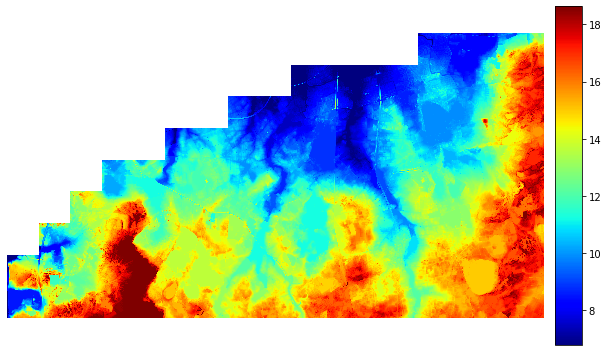

In [112]:
filename2_filled    = rd.FillDepressions(filename2, in_place=False)
filenamefig2_filled = rd.rdShow(filename2_filled, ignore_colours=[0], axes=False, cmap='jet', vmin=filenamefig2['vmin'], vmax=filenamefig2['vmax'], figsize=(9,5))

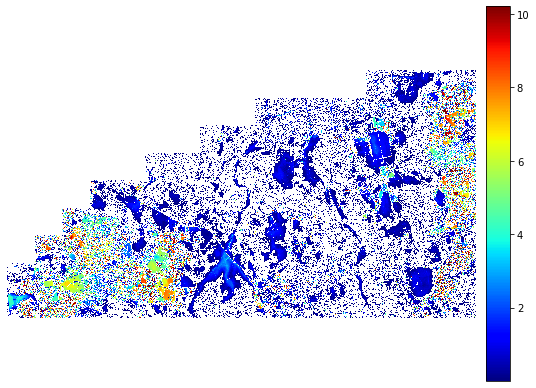

In [113]:
#The difference between the two

filename_diff    = filename_filled - filename
filenamefig_diff = rd.rdShow(filename_diff, ignore_colours=[0], axes=False, cmap='jet', figsize=(8,5.5))

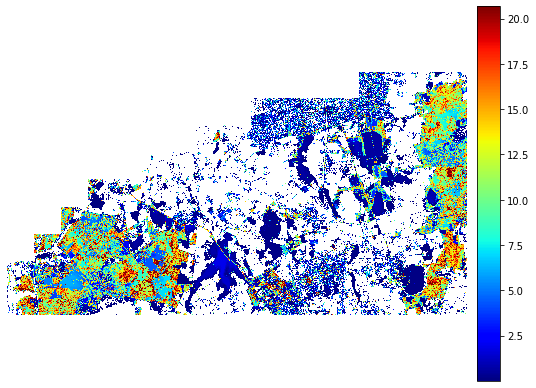

In [114]:
filename_diff    = filename_filled - filename2_filled
filenamefig_diff = rd.rdShow(filename_diff, ignore_colours=[0], axes=False, cmap='jet', figsize=(8,5.5))

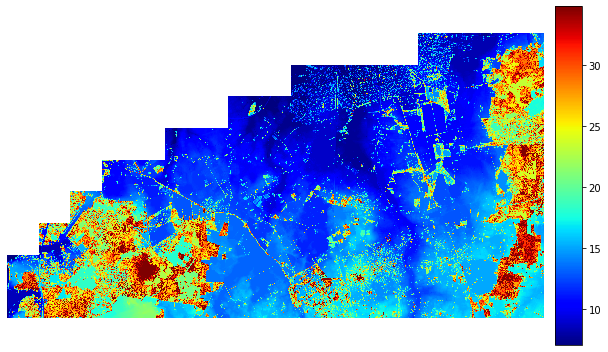

In [82]:
#Complete Filling
#Depression-filling is often used to fill in all the depressions in a DEM to the level of their lowest outlet or spill-point


filename_filled    = rd.FillDepressions(filename, in_place=False)
filenamefig_filled = rd.rdShow(filename_filled, ignore_colours=[0], axes=False, cmap='jet', vmin=filenamefig['vmin'], vmax=filenamefig['vmax'], figsize=(9,5))

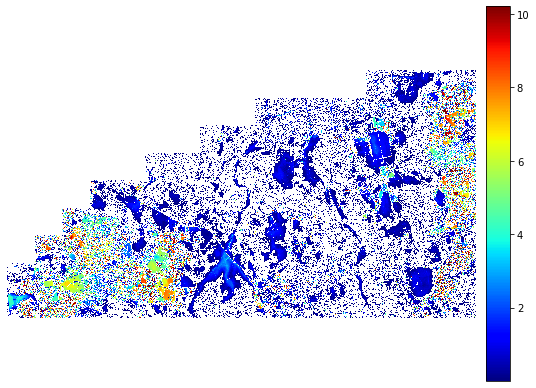

In [65]:
#The difference between the two

filename_diff    = filename_filled - filename
filenamefig_diff = rd.rdShow(filename_diff, ignore_colours=[0], axes=False, cmap='jet', figsize=(8,5.5))

In [37]:
from geopy.geocoders import GoogleV3
geolocator = GoogleV3()
location = geolocator.reverse("51.225837, 4.406690")
print(location.address)

C:\Users\Santosh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Since July 2018 Google requires each request to have an API key. Pass a valid `api_key` to GoogleV3 geocoder to hide this warning. See https://developers.google.com/maps/documentation/geocoding/usage-and-billing
  


GeocoderQueryError: Your request was denied.